# Numpy 1D-DFT
- reference: http://dcwww.camd.dtu.dk/~askhl/files/python-dft-exercises.pdf
- Goal: write our own Kohn-Sham (KS) DFT code
    - Target: a harmonic oscillator including kinetic energy, electrostatic repulsion between the electrons, and the local density approximation for electronic interactions, ignoring correlation.
    - Hamiltonian:
    
$$\hat{H}=-\frac{1}{2}\frac{d^2}{dx^2}+v(x)\\
v(x)=v_{Ha}(x)+v_{LDA}(x)+x^2$$

- What we have to do?
    1. Represent the Hamiltonian
    1. Calculate the KS wavefunctions, the density

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("white")

# Differential operator
- In order to represent kinetic operator
- In this section, our goal is to differentiate a sin curve, represented as a grid function as folllows:

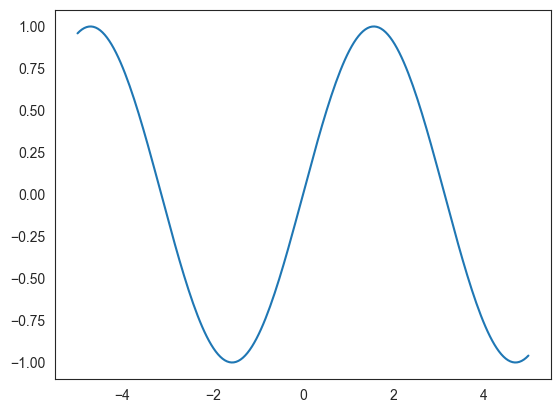

In [3]:
n_grid=200
x=np.linspace(-5,5,n_grid)
y=np.sin(x)
plt.plot(x,y)

### First order differentiation

- approximate:

$$(\frac{dy}{dx})_{i}=\frac{y_{i+1}-{y_{i}}}{h}$$

- then:

$$D_{ij}=\frac{\delta_{i+1,j}-\delta_{i,j}}{h}$$

- we could write as follows:

$$(\frac{dy}{dx})_{i}=D_{ij} y_{j}$$


- The derivative may not be well defined at the end of the grid.
- $\delta_{ij}$ is Kronecker delta
- Einstein summation is used for last equation

### Second order differentiation

- In the same way as the first order:

$$D^2_{ij}=\frac{\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}}{h^2}$$

- This could be written with the first order $D_{ij}$, as follows (take care of the transpose):

$$D^2_{ij}=-D_{ik}D_{jk}$$

- The derivative may not be well defined at the end of the grid.

In [4]:
h=x[1]-x[0]
D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1)
D = D / h

### D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1):   
这一行创建了一个差分矩阵D。np.eye(n_grid)生成了一个n_grid x n_grid的单位矩阵，  
而np.diagflat(np.ones(n_grid-1),1)生成了一个n_grid x n_grid的上对角矩阵，  
其中对角线上的元素是1。然后，通过将单位矩阵减去这个上对角矩阵，得到了一个差分矩阵D，
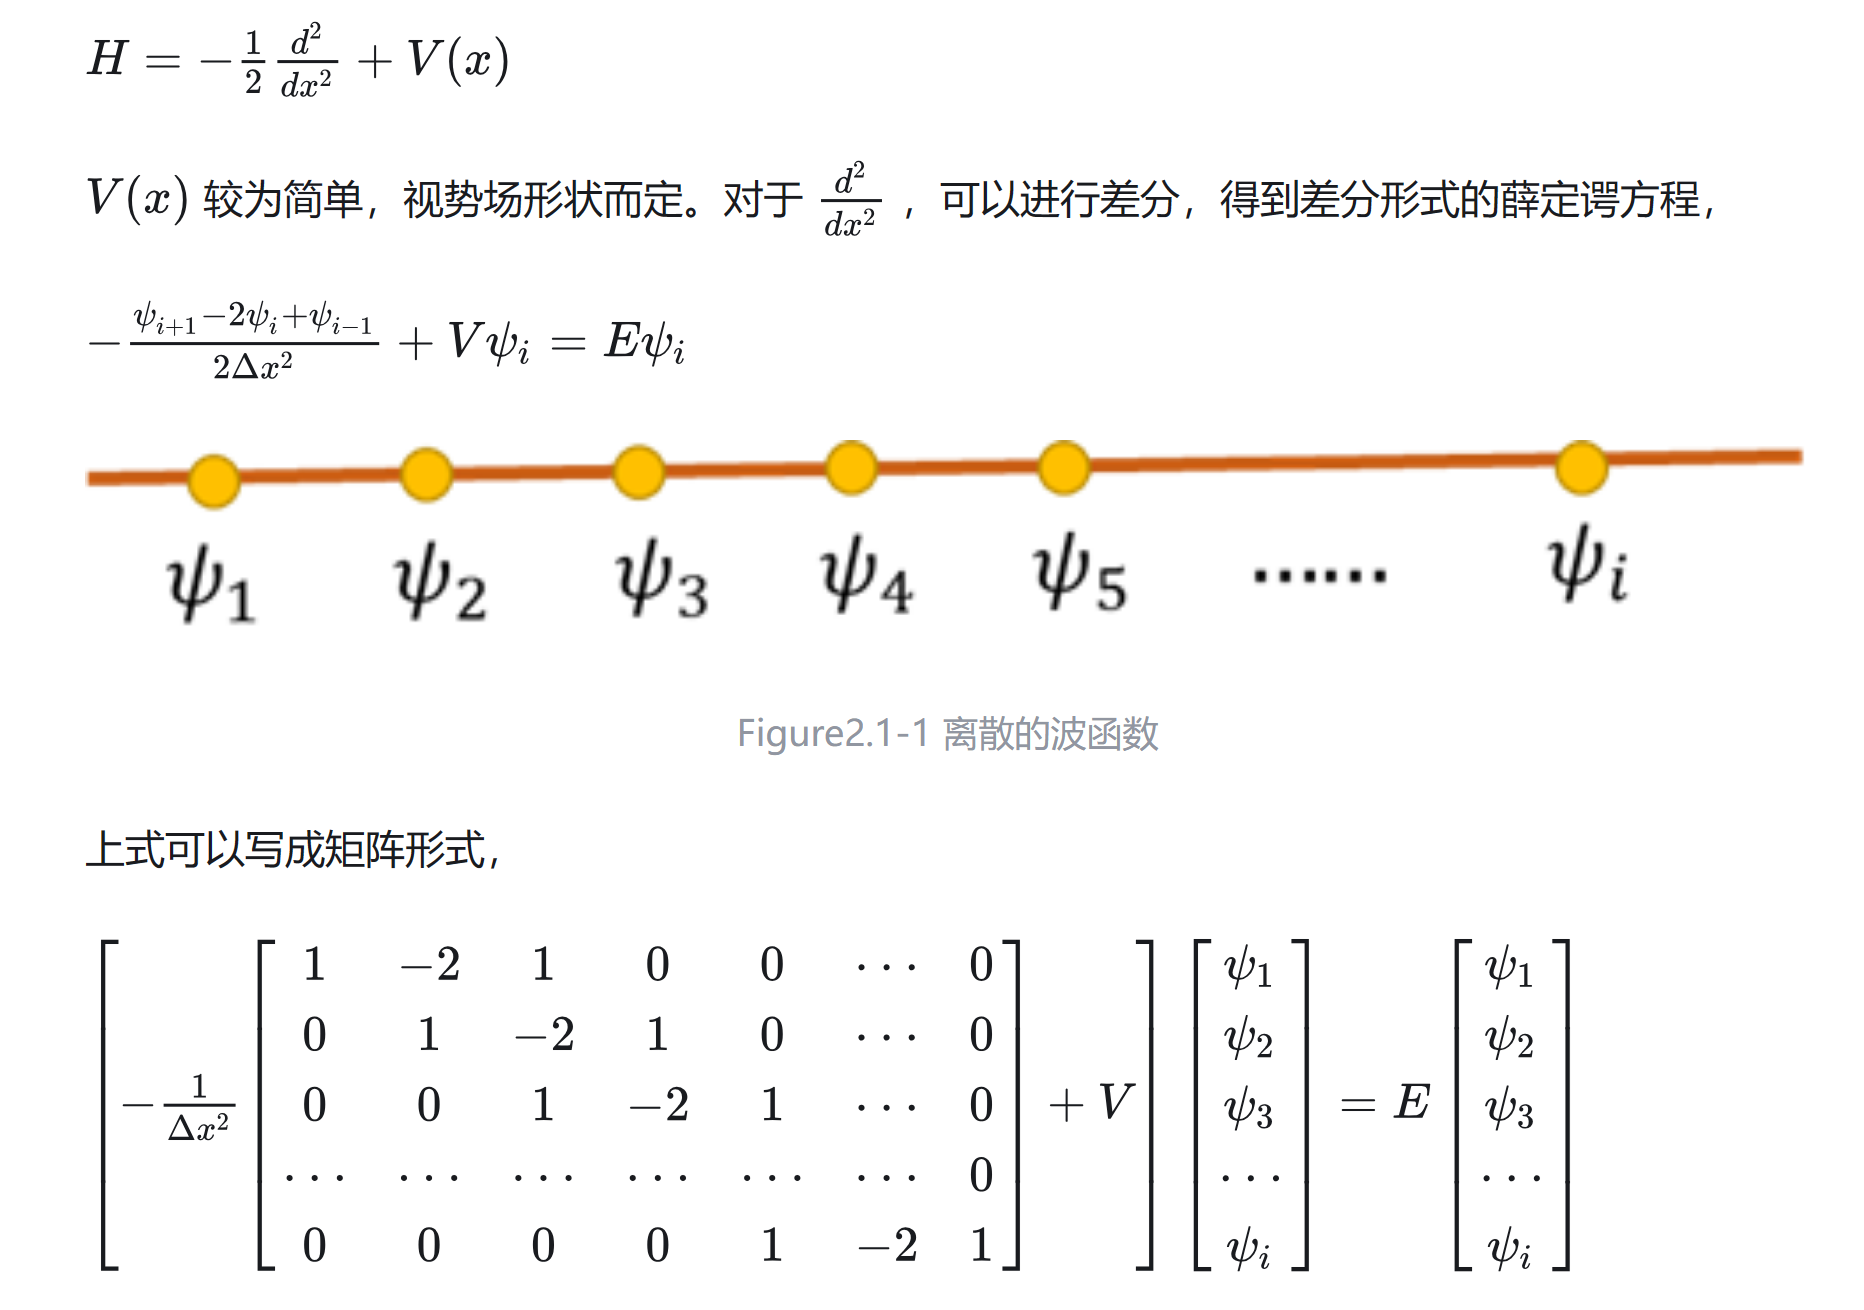
其中对角线上的元素是-1，而对角线上方的元素是1

In [5]:
a=np.eye(3)
b=np.diagflat(10)
c=np.ones(n_grid-1)
d=np.diagflat(np.ones(n_grid-1),1)
print(d)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

### ascertain

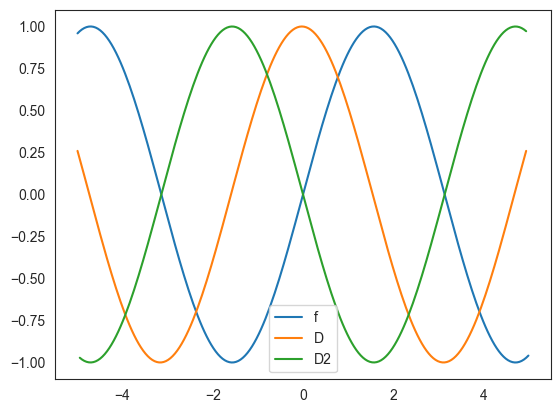

In [7]:
sns.set_style("white")
plt.plot(x,y, label="f")
plt.plot(x[:-1],D.dot(y)[:-1], label="D")
plt.plot(x[1:-1],D2.dot(y)[1:-1], label="D2")
plt.legend()

完成求二阶导数

---

# Non-interacting electrons
- This is the Hamiltonian of non-interacting free particles in a box given by the size of grid:
$$\hat{H} = \hat{T} = - \frac{1}{2} \frac{d^2}{dx^2}$$

- We could solve the KS equation as follows:

In [8]:
eig_non, psi_non=np.linalg.eigh(-D2/2)

- plot (energies are shown in the label)
- np.linalg.eigh 是 NumPy 库中的函数，用于计算对称矩阵的特征值和特征向量。它的语法如下：

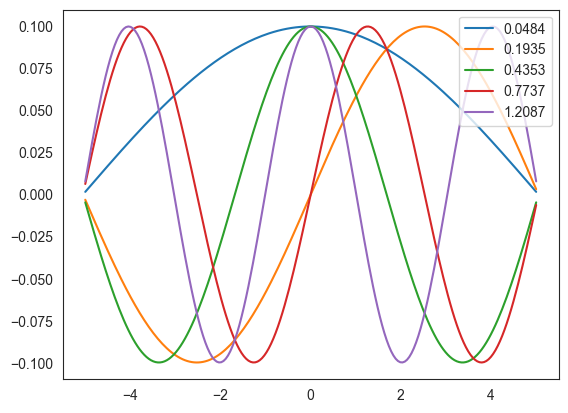

In [9]:
for i in range(5):
    plt.plot(x,psi_non[:,i], label=f"{eig_non[i]:.4f}")
    plt.legend(loc=1) #plt.legend(loc=1) 是 Matplotlib 库中用于在图表中添加图例的函数调用。其中的 loc 参数用于指定图例的位置。

# Harmonic oscillator
- include the external potential $v_{ext}=x^2$:
$$\hat{H} = \hat{T} = - \frac{1}{2} \frac{d^2}{dx^2} + x^2$$

- we can write the potential as a matrix $X$, as follows:

In [10]:
X=np.diagflat(x*x)

- and solve the KS.

In [11]:
eig_harm, psi_harm = np.linalg.eigh(-D2/2+X)

- plot

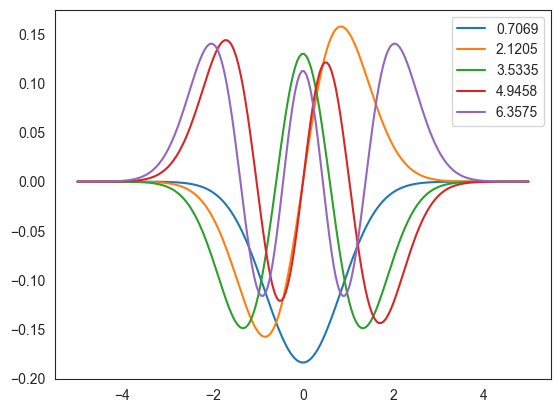

In [12]:
for i in range(5):
    plt.plot(x,psi_harm[:,i], label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)

# Well potential

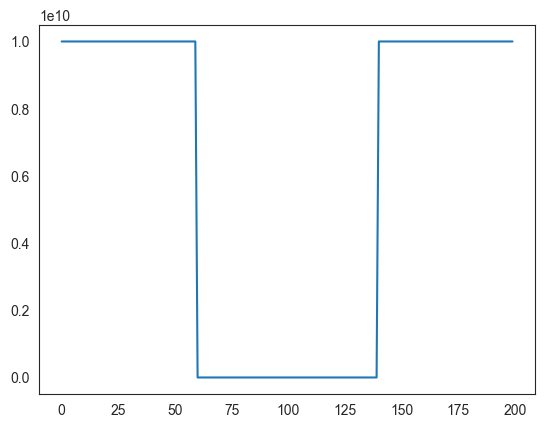

In [13]:
w=np.full_like(x,1e10) #  NumPy 库的 full_like 函数，用于创建一个与给定数组 x 具有相同形状的数组，并填充指定的常数值。
#无限深势阱
w[np.logical_and(x>-2,x<2)]=0. #浮点数
#np.logical_and(x > -2, x < 2) 的作用是

#对数组 x 中的每个元素执行逻辑与运算，条件是该元素大于 -2 并且小于 2。
#这样的操作通常用于根据某些条件过滤数组中的元素。在这个例子中，它可能用于筛选出数组 x 中位于 -2 和 2 之间的元素。

plt.plot(w)

- solve the KS

In [14]:
eig_well, psi_well= np.linalg.eigh(-D2/2+np.diagflat(w))

- plot

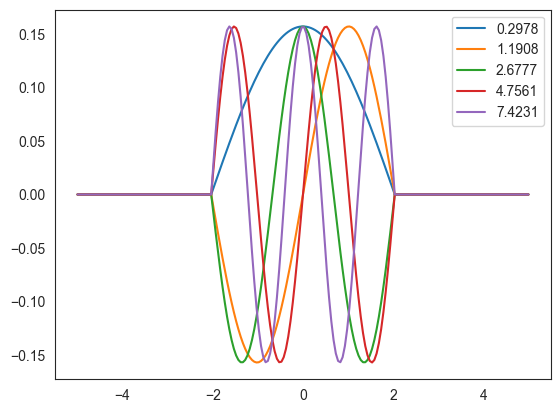

In [15]:
for i in range(5):
    plt.plot(x,psi_well[:,i], label=f"{eig_well[i]:.4f}")
    plt.legend(loc=1)

完成求本征值的操作

---

# Density
- We will want to include the **Coulomb or Hatree interacion** as well as LDA exchange
- Both of which are density functinals
- So we need to calculate the electron density
- Each state should be normalized:
$$\int \lvert \psi \rvert ^2 dx = 1$$

- let $f_n$ be **occupation numbers**, the density $n(x)$ can be written as follows:
$$n(x)=\sum_n f_n \lvert \psi(x) \rvert ^2 $$

- Note:
    - Each state fits up to two electrons: one with spin up, and one with spin down.
    - In DFT, we calculate the ground state.

In [16]:
# integral
def integral(x,y,axis=0):
    dx=x[1]-x[0]
    return np.sum(y*dx, axis=axis)
    #axis=0 意味着沿着数组的第一个轴（即行）进行求和。

- number of electrons

In [17]:
num_electron=17

- density

In [18]:
def get_nx(num_electron, psi, x):
    # normalization
    I=integral(x,psi**2,axis=0)
    # print(I)
    normed_psi=psi/np.sqrt(I)[None, :]
    # print(normed_psi.shape)
    # print(normed_psi)
    #[None, :] 是一种索引和切片的语法，用于在 NumPy 数组中增加维度。
    #在这个上下文中，它的作用是在数组的第一个维度上增加一个新的维度。
    #None：在 NumPy 中，使用 None 作为索引会在对应位置上增加一个新的长度为1的维度。这通常称为插入新的轴。例如，如果数组 A 的形状为 (3, 4)，那么 A[None, :] 将会变成形状为 (1, 3, 4) 的新数组。这表示在原数组 A 的第一个维度上增加了一个新的维度。
    #: 表示对整个维度进行切片，不进行任何变化。在这个例子中，
    #: 表示对数组的第二个维度（即原数组 psi 中的列）进行切片，不进行任何变化。

    # occupation num
    fn=[2 for _ in range(num_electron//2)]
    
    #相当于能带数
    
    # print(fn)#将2 添加到列表里面   只有能量最低的几个带
    
    if num_electron % 2:
        fn.append(1)

    # density
    
    res=np.zeros_like(normed_psi[:,0])
    # 具体来说，np.zeros_like(normed_psi[:,0]) 的作用是创建一个与 normed_psi 的第一列具有相同形状的全零数组。
    # normed_psi[:,0]：表示取 normed_psi 数组的所有行（:），以及第一列（0）的元素。
    # np.zeros_like()：这是一个函数，用于创建一个与给定数组具有相同形状的全零数组。
    # 在这个例子中，它会根据 normed_psi[:,0] 的形状创建一个全零数组。
    
    # print(res)
    for ne, psi  in zip(fn,normed_psi.T):
        
        # print(ne)
        # print(zip(fn,normed_psi.T))
        res += ne*(psi**2)
    return res
    # 这是一个循环，通过 zip 函数同时迭代 fn 列表中的元素 ne 和 normed_psi 转置后的每一列 psi。
    
    #normed_psi.T 200*200的矩阵
    
    # fn 中的元素 ne 是每个波函数的权重，而 psi 是每个波函数的正态化系数。
    # 由于 normed_psi 是一个二维数组，我们使用 T 属性来对其进行转置，以便按列迭代。
    # res += ne * (psi ** 2)：在循环中，对每个波函数的正态化系数 psi 进行平方运算，
    # 然后乘以对应的权重 ne，将结果累加到 res 中。这个步骤相当于将每个波函数的平方加权和累加到 res 中。
    # return res：最后，返回计算结果 res。
    # 整个过程相当于将每个波函数的平方加权和计算出来，并将结果保存在 res 中返回。

In [19]:
'''
zip的用法:

list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

zipped = zip(list1, list2)

for item in zipped:
    print(item)
(1, 'a')
(2, 'b')
(3, 'c')

'''


"\nzip的用法:\n\nlist1 = [1, 2, 3]\nlist2 = ['a', 'b', 'c']\n\nzipped = zip(list1, list2)\n\nfor item in zipped:\n    print(item)\n(1, 'a')\n(2, 'b')\n(3, 'c')\n\n"

In [20]:
#演示[None, :]
'''
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6]])
new_arr = arr[None, :]

print(new_arr.shape)
print(new_arr)
'''


'\nimport numpy as np\n\narr = np.array([[1, 2, 3],\n                [4, 5, 6]])\nnew_arr = arr[None, :]\n\nprint(new_arr.shape)\nprint(new_arr)\n'

- plot

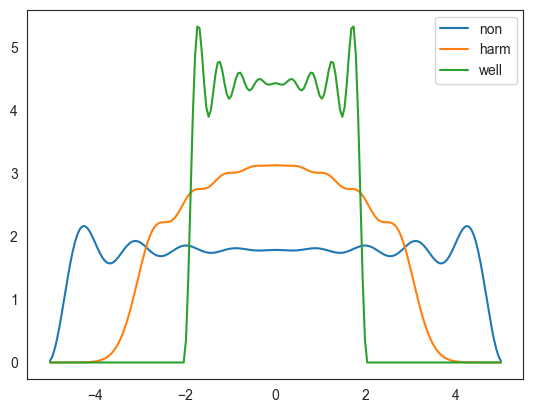

In [21]:
plt.plot(x,get_nx(num_electron,psi_non, x), label="non")
# print(psi_non)
plt.plot(x,get_nx(num_electron,psi_harm, x), label="harm")#谐振

plt.plot(x,get_nx(num_electron,psi_well, x), label="well")#势阱
# plt.legend(loc="upper left") #loc=1 代表右上角
plt.legend(loc=1)

# Exchange energy
- Consider the exchange functional in the LDA:
    - ignore the correlation for simplicity.

$$ E_X^{LDA}[n] = -\frac{3}{4} \left(\frac{3}{\pi}\right)^{1/3} \int n^{4/3} dx$$

- The potential is given by the derivative of the exchange energy with respect to the density:

$$ v_X^{LDA}[n] = \frac{\partial E_X^{LDA}}{\partial n} = - \left(\frac{3}{\pi}\right)^{1/3} n^{1/3}$$

- code

In [22]:
def get_exchange(nx,x):
    energy=-3./4.*(3./np.pi)**(1./3.)*integral(x,nx**(4./3.))
    potential=-(3./np.pi)**(1./3.)*nx**(1./3.)
    return energy, potential

# coulomb potential
- Electrostatic energy or Hatree energy
- The expression of 3D-Hatree energy is not converged in 1D.
- Hence we cheat and use a modified as follows:
$$ E_{Ha}=\frac{1}{2}\iint \frac{n(x)n(x')}{\sqrt{(x-x')^2+\varepsilon}}dxdx'$$

    - where $\varepsilon$ is a small positive constant

- The potential is given by:
$$ v_{Ha}=\int \frac{n(x')}{\sqrt{(x-x')^2+\varepsilon}}dx'$$

- In a matirx expression:
$$E_{Ha} = \frac{1}{2} \frac{n_in_jh^2}{\sqrt{(x_{i}-x_{j})^2+\varepsilon}}$$
$$v_{Ha, i} = \frac{n_jh}{\sqrt{(x_{i}-x_{j})^2+\varepsilon}}$$

In [23]:
def get_hatree(nx,x, eps=1e-1):
    h=x[1]-x[0]
    energy=np.sum(nx[None,:]*nx[:,None]*h**2/np.sqrt((x[None,:]-x[:,None])**2+eps)/2)
    potential=np.sum(nx[None,:]*h/np.sqrt((x[None,:]-x[:,None])**2+eps),axis=-1)
    return energy, potential

# Solve the KS equation：Self-consistency loop
0. initialize the density (you can take an arbitrary constant)
1. Calculate the Exchange and Hatree potentials
2. Calculate the Hamiltonian
3. Calculate the wavefunctions and eigen values
4. If not converged, calculate the density and back to 1.

In [24]:
def print_log(i,log):
    print(f"step: {i:<5} energy: {log['energy'][-1]:<10.4f} energy_diff: {log['energy_diff'][-1]:.10f}")

In [25]:
max_iter=1000
energy_tolerance=1e-5
log={"energy":[float("inf")], "energy_diff":[float("inf")]}

In [26]:
nx=np.zeros(n_grid)
for i in range(max_iter):
    ex_energy, ex_potential=get_exchange(nx,x)
    ha_energy, ha_potential=get_hatree(nx,x)
    
    # Hamiltonian
    H=-D2/2+np.diagflat(ex_potential+ha_potential+x*x)


    ###
    ###哈密顿量出现了变化
    ###
    energy, psi= np.linalg.eigh(H)
    
    # log
    log["energy"].append(energy[0])
    energy_diff=energy[0]-log["energy"][-2]
    log["energy_diff"].append(energy_diff)
    print_log(i,log)
    
    # convergence
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break
    
    # update density
    nx=get_nx(num_electron,psi,x)
else:
    print("not converged")

step: 0     energy: 0.7069     energy_diff: -inf
step: 1     energy: 16.3625    energy_diff: 15.6555321919
step: 2     energy: 13.8021    energy_diff: -2.5603559494
step: 3     energy: 15.3002    energy_diff: 1.4980525863
step: 4     energy: 14.4119    energy_diff: -0.8882287680
step: 5     energy: 14.9470    energy_diff: 0.5350438262
step: 6     energy: 14.6242    energy_diff: -0.3228271880
step: 7     energy: 14.8201    energy_diff: 0.1959328656
step: 8     energy: 14.7011    energy_diff: -0.1190355457
step: 9     energy: 14.7735    energy_diff: 0.0724651058
step: 10    energy: 14.7294    energy_diff: -0.0441312736
step: 11    energy: 14.7563    energy_diff: 0.0268946713
step: 12    energy: 14.7399    energy_diff: -0.0163922405
step: 13    energy: 14.7499    energy_diff: 0.0099933983
step: 14    energy: 14.7438    energy_diff: -0.0060926001
step: 15    energy: 14.7475    energy_diff: 0.0037147279
step: 16    energy: 14.7452    energy_diff: -0.0022649307
step: 17    energy: 14.7466   

- plot

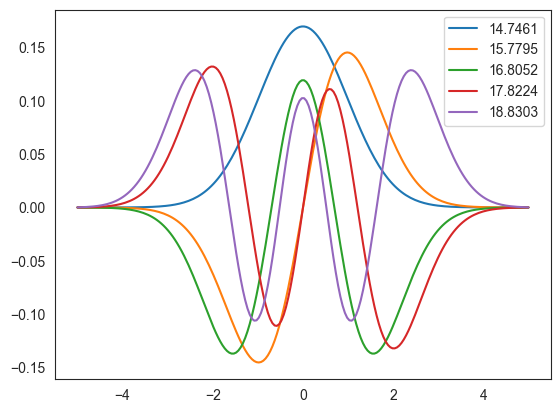

In [27]:
for i in range(5):
    plt.plot(x,psi[:,i], label=f"{energy[i]:.4f}")
    plt.legend(loc=1)

- compare the density to free particles

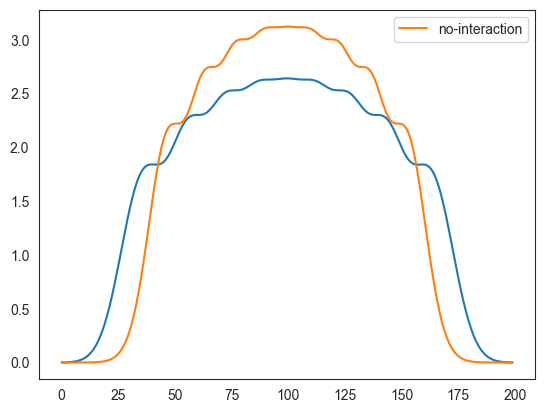

In [28]:
plt.plot(nx)
plt.plot(get_nx(num_electron,psi_harm,x), label="no-interaction")
plt.legend()